In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
from mpl_toolkits import mplot3d
from matplotlib import cm
%matplotlib notebook
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
from mpl_toolkits import mplot3d
import pandas as pd

#import scipy.integrate as integrate

#%pylab

In [2]:
#constants

h_bar = 1.9e5 #in KJ.A.mol-1.c-2            
m_3He = 2.59e11# in kj.mol-1.c^-2 For 3He
m_4He = 3.39e11# in kj.mol-1.c^-2 For 4He

In [3]:
#IF you want to reduce the grid close to zero, please  just change the starting value of h_positive and h_negative: In this case, it iis 0.03

# Define grid for plotting
a_r, b_r = -3.5, 3.5 #Starting and ending grid point for r direction
a_z, b_z = 1.5, 4.15 #Starting and ending grid point for z direction for all IT WAS 4.15 BEFORE
#a_z=-3.5 #For HARMONIC APPROXIMATION
Nz= Nr = N = 138 #120 works
#Nz= Nr = N = 99  #Number of grid points         YOU CAN USE MORE THAN 100 NUMBERS OF POINTS ON EACH SIDE                                                                                                                                                                                                                    

# Generate the grid points
z= np.linspace(a_z,b_z,Nz+1, dtype=float)
r= np.linspace(a_r,b_r,Nr+1, dtype=float)

#set the uniform grid spacing 
dr=r[1]-r[0] # Step size along the r axis
dz=z[1]-z[0]  # Step size along the z axis
#dr=2*np.pi*ddr# Step size along the r axis
#dz=z[1]-z[0]  # Step size along the z axis

##################################### Evaluation of the function on a grid ##############################
Z,R = np.meshgrid(z,r)
#########################################################################################################

In [4]:
dr**2

0.002572988867884876

<IPython.core.display.Javascript object>


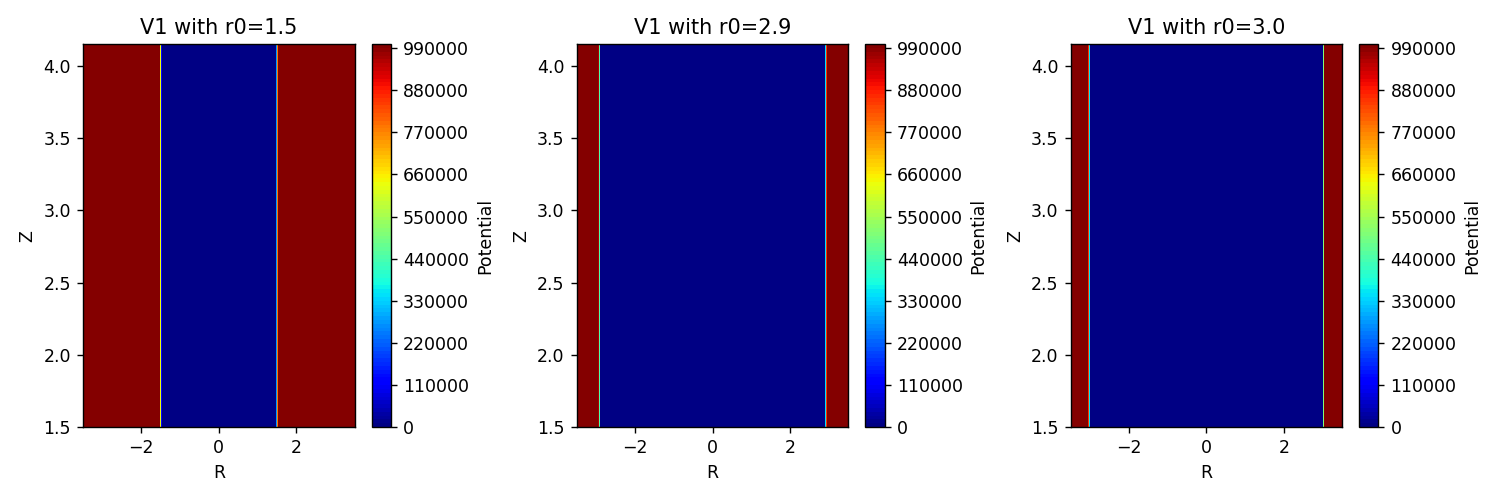

C:\Users\gouati08\AppData\Local\Temp\ipykernel_21860\4290011187.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(r0_values), i+1)


In [5]:
####################### Potential energy: ANHARMONIC APPROXIMATION #######################
################ Morse Potential (CCSD(T)/aug-cc-pVTZ) in CFOUR ###############################################################################
De=15.725#in Kj/mol   # Dissociation energy
alpha=2.422# in 1/(Angstrom)  # Variable related to the curvature of the curve  
ze=1.803 # in (Angstrom)       # Minimum distance 


z2=(z-ze)
def get2_potential(z2):
    return De*(np.exp(-2*alpha*z2)-2*np.exp(-alpha*z2))


#####################  Infinite cylindrical well. #####################
# Define the range of r0 values
#r0_values = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5,
             #1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
    
#r0_values = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5,
             #1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
r0_values = [1.5, 2.9, 3.0]
# Define the potential functions
def V1(R, r0):
    return np.where(np.abs(R) < r0, 0, 1000000)

# Generate and plot potentials for V1 with all r0 values
plt.figure(figsize=(12, 4))
ax = plt.axes(projection='3d')
for i, r0 in enumerate(r0_values):
    V1_potential = V1(R, r0)
    plt.subplot(1, len(r0_values), i+1)
    plt.contourf(R, Z, V1_potential, 100, cmap='jet')
    plt.title(f'V1 with r0={r0}')
    plt.xlabel('R')
    plt.ylabel('Z')
    plt.colorbar(label='Potential')
plt.tight_layout()
plt.show()

# Generate and plot potentials for V2 with all r0 and beta values
#plt.figure(figsize=(12, 4))
#for i, r0 in enumerate(r0_values):
    #for j, beta in enumerate(beta_values):
       # V2_potential = V2(R, r0, beta)
        #plt.subplot(len(r0_values), len(beta_values), i*len(beta_values) + j + 1)
        #plt.contourf(R, Z, V2_potential, 100, cmap='jet')
       # plt.title(f'V2 with r0={r0}, beta={beta}')
        #plt.xlabel('R')
       # plt.ylabel('Z')
        #plt.colorbar(label='Potential')
#plt.tight_layout()
#plt.show()


# If $r_{0} > R$, we have a Morse potential. Here, $R$ is the cylinder's radius (i.e., half the diameter). If $r_{0} < R$, the potential has a different form (unspecified).


In [7]:
#Solution Matrix
A = np.zeros((Nr+1,Nr+1))
for i in range(1,Nr):
    for j in range(1,Nr):
        if i==j:
# Main central diagonal.  
            A[i,j]=-2
# Lower main diagonal. 
        elif i==j+1:
            A[i,j]=(1-(1/(2*(j+1))))
# Upper main diagonal.
        elif i+1==j:
            A[i,j]=(1+(1/(2*(j-1))))
            

# Apply boundary conditions to the coefficient matrix 
#Boundary conditions at r=0
A[0,0]=-4
A[0,1]=4
A[1,0] = (1-(1/(2*(0+1)))) #left

# Set the boundary conditions
#A[-1:,-1:] =0.5 #rigth

A[N-1:,N:] = (1+(1/(2*((N)-1)))) #Good

#A[N:,N-1:] = 0 #bottom
#A[-1:,-1:] = 0 #rigth

A[N:,N-1:] = (1-(1/(2*(N)))) #bottom #Good
A[-1:,-1:] =-2 #rigth Good
#A[:,4] =0.5

############################################## Division of the Matrix by the square step size (dr)#####################
AA=A/(dr**2)
#AA

B=np.zeros((Nz+1,Nz+1))
for q in range(Nz+1):
    for n in range(Nz+1):
        if q==n:
            B[q,n]=-2
        elif q==n+1:
            B[q,n]=1
        elif q+1==n:
            B[q,n]=1
            
############################################## Division of the Matrix by the square step size (dz)#####################
BB=B/(dz**2)
#BB
IB=np.identity(N+1)
IA=np.identity(N+1)
####################################################################################################
s1 = np.kron(IB,AA)
s2 = np.kron(BB,IA)
s =  s1 + s2


Hamii=(T1+V4)
eigenvaluess, eigenvectorss = np.linalg.eigh(Hamii)
E=eigenvaluess
W=eigenvectorss.T  #we use T as a transpose here which is a kind of normalization in analytical resolution

In [ ]:
def create_kinetic_energy_operator(mass):
    """
    Create the kinetic energy operator T1 based on the mass and grid size.
    """
    T1 = -((h_bar**2) / (2 * mass)) * s
    return T1


def create_potential_operator(z, ze, De, alpha, r0, potential_type ='V1'):
    """
    Create the potential energy operator based on the r0, beta values, and potential type.
     Parameters:
    R (numpy array): The array of radial distances.
    r0 (float): The cutoff radius for the potential.
    beta (float, optional): The beta parameter for the harmonic approximation (only used if potential_type is 'V2').
    potential_type (str): The type of potential to calculate ('V1' or 'V2').
    """
    if potential_type == 'V1':
        V_radial = np.where(np.abs(R) < r0, 0, 1000000)
    else:
        raise ValueError("Invalid potential_type. Use 'V1'")

    # Calculate the additional potential
    def get2_potential(z2):
        return De * (np.exp(-2 * alpha * z2) - 2 * np.exp(-alpha * z2))

    # Compute the total potential
    V_additional = get2_potential(z2)
    V_total = V_additional + V_radial # USE V_radial2 to include beta
    V_matrix = np.diag(V_total.reshape((Nz+1)**2))
    return V_matrix

def create_hamiltonian(mass, r0, potential_type='V1'):
    """
    Create the Hamiltonian matrix for given mass, potential type, r0, and beta values.
    """
    T1 = create_kinetic_energy_operator(mass)
    V = create_potential_operator(z, ze, De, alpha, r0, potential_type='V1')
    Hamii = T1 + V
    return Hamii

# Initialize lists to store results
results = []

# Compute Hamiltonians and eigenvalues for different cases
for mass in [m_4He]:
    for r0 in r0_values:
        for potential_type in ['V1']: # print only V1
            Hamii = create_hamiltonian(mass, r0, potential_type='V1')
            
            # Compute eigenvalues and eigenvectors
            eigenvalues, eigenvectors = np.linalg.eigh(Hamii)
            
            # Store results
            results.append({
                'Mass': mass,
                'r0': r0,
                'Potential Type': potential_type,
                'Lowest Eigenvalue': eigenvalues[0]+De
            })

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Print results in a table
print(df_results.to_string(index=False))